#  **Retail Store Sales Items Analysis**
First let's import and explore the dataset

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import holidays
import textwrap




In [4]:
rt_sales = pd.read_csv("..\\data\\retail_store_sales.csv")
rt_sales.head()

,Transaction ID,Customer ID,Category,Item,Price Per Unit,Quantity,Total Spent,Payment Method,Location,Transaction Date,Discount Applied
0,TXN_6867343,CUST_09,Patisserie,Item_10_PAT,18.5,10.0,185.0,Digital Wallet,Online,2024-04-08,True
1,TXN_3731986,CUST_22,Milk Products,Item_17_MILK,29.0,9.0,261.0,Digital Wallet,Online,2023-07-23,True
2,TXN_9303719,CUST_02,Butchers,Item_12_BUT,21.5,2.0,43.0,Credit Card,Online,2022-10-05,False
3,TXN_9458126,CUST_06,Beverages,Item_16_BEV,27.5,9.0,247.5,Credit Card,Online,2022-05-07,NaN
4,TXN_4575373,CUST_05,Food,Item_6_FOOD,12.5,7.0,87.5,Digital Wallet,Online,2022-10-02,False


In [5]:
rt_sales.shape

(12575, 11)

In [6]:
rt_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12575 entries, 0 to 12574
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Transaction ID    12575 non-null  object 
 1   Customer ID       12575 non-null  object 
 2   Category          12575 non-null  object 
 3   Item              11362 non-null  object 
 4   Price Per Unit    11966 non-null  float64
 5   Quantity          11971 non-null  float64
 6   Total Spent       11971 non-null  float64
 7   Payment Method    12575 non-null  object 
 8   Location          12575 non-null  object 
 9   Transaction Date  12575 non-null  object 
 10  Discount Applied  8376 non-null   object 
dtypes: float64(3), object(8)
memory usage: 1.1+ MB


In [7]:
rt_sales.nunique()

Transaction ID      12575
Customer ID            25
Category                8
Item                  200
Price Per Unit         25
Quantity               10
Total Spent           227
Payment Method          3
Location                2
Transaction Date     1114
Discount Applied        2
dtype: int64

In [8]:
rt_sales.describe()

,Price Per Unit,Quantity,Total Spent
count,11966.000000,11971.000000,11971.000000
mean,23.365912,5.536380,129.652577
std,10.743519,2.857883,94.750697
min,5.000000,1.000000,5.000000
25%,14.000000,3.000000,51.000000
50%,23.000000,6.000000,108.500000
75%,33.500000,8.000000,192.000000
max,41.000000,10.000000,410.000000


In [9]:
rt_sales.columns

Index(['Transaction ID', 'Customer ID', 'Category', 'Item', 'Price Per Unit',
       'Quantity', 'Total Spent', 'Payment Method', 'Location',
       'Transaction Date', 'Discount Applied'],
      dtype='object')

## **Is the dataset clean?**

In [10]:
rt_sales.dtypes

Transaction ID       object
Customer ID          object
Category             object
Item                 object
Price Per Unit      float64
Quantity            float64
Total Spent         float64
Payment Method       object
Location             object
Transaction Date     object
Discount Applied     object
dtype: object

Some columns have an ‘object’ data type, which is not suitable for analysis, so we will convert them to appropriate types

In [11]:
rt_sales["Payment Method"] = rt_sales["Payment Method"].astype('category')
rt_sales["Category"] = rt_sales["Category"].astype('category')
rt_sales["Location"] = rt_sales["Location"].astype('category')
rt_sales["Discount Applied"] = rt_sales["Discount Applied"].astype(bool)




In [12]:
rt_sales["Transaction Date"] = pd.to_datetime(rt_sales["Transaction Date"])

After casting columns to suitable data types we should look in for  null values in the dataset . if there is null values we must impute it with meaningfull values. 

In [13]:
rt_sales.isna().sum()

Transaction ID         0
Customer ID            0
Category               0
Item                1213
Price Per Unit       609
Quantity             604
Total Spent          604
Payment Method         0
Location               0
Transaction Date       0
Discount Applied       0
dtype: int64

In [14]:
Item_mode= (rt_sales.groupby('Category')['Item'].agg(lambda x: x.mode().iat[0]))
rt_sales['Item'] = rt_sales['Item'].fillna(rt_sales['Category'].map(Item_mode))

Disount_mode= (rt_sales.groupby('Category')['Discount Applied'].agg(lambda x: x.mode().iat[0]))
rt_sales['Discount Applied'] = rt_sales['Discount Applied'].fillna(rt_sales['Category'].map(Disount_mode))


C:\Users\moust\AppData\Local\Temp\ipykernel_26656\919151153.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  Item_mode= (rt_sales.groupby('Category')['Item'].agg(lambda x: x.mode().iat[0]))
C:\Users\moust\AppData\Local\Temp\ipykernel_26656\919151153.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  Disount_mode= (rt_sales.groupby('Category')['Discount Applied'].agg(lambda x: x.mode().iat[0]))


In [15]:
rt_sales['Item Number'] = rt_sales['Item'].str.extract(r'(\d+)')
rt_sales["Item Number"] = rt_sales["Item Number"].astype(int)



In [16]:
def fill_quantity(x):
    m = x.mode()
    if len(m) > 0:
        return m.iloc[0]  
    else:
        return int(x.median())  


In [17]:

rt_sales["Quantity"] = rt_sales.groupby("Item")["Quantity"].transform(lambda x: x.fillna(fill_quantity(x)))
rt_sales["Price Per Unit"] = rt_sales["Price Per Unit"].fillna(rt_sales.groupby("Item")["Price Per Unit"].transform("mean"))
rt_sales["Total Spent"] = rt_sales["Total Spent"].fillna(rt_sales["Quantity"]*rt_sales["Price Per Unit"])

In [18]:
rt_sales.isna().sum()

Transaction ID      0
Customer ID         0
Category            0
Item                0
Price Per Unit      0
Quantity            0
Total Spent         0
Payment Method      0
Location            0
Transaction Date    0
Discount Applied    0
Item Number         0
dtype: int64

Now we solved missing values problem in the dataset , it is time to check if there is a duplicate inputs to be dropped.

In [19]:
rt_sales.duplicated().sum()

np.int64(0)

After reviewing the dataset, we found no duplicate rows , now we will extract the time columns that will help us in our time-based analysis later . 
we will also delete unneccesry columns

In [20]:
rt_sales["Transaction Year"] = rt_sales["Transaction Date"].dt.year
rt_sales["Transaction Month"] = rt_sales["Transaction Date"].dt.month_name()
rt_sales["Transaction Day"] = rt_sales["Transaction Date"].dt.day_name()
rt_sales["Month Day"] = rt_sales["Transaction Date"].dt.day

rt_sales["Month Day"] = rt_sales["Month Day"].astype(int)

rt_sales["Transaction DOW"] = rt_sales["Transaction Date"].dt.day_of_week
rt_sales['Quarter'] = rt_sales['Transaction Date'].dt.quarter
rt_sales['Is_Weekend'] = rt_sales['Transaction DOW'].isin([4,5]).astype(int)



In [21]:
years = rt_sales["Transaction Year"].unique()


In [22]:
eg_holidays = holidays.EG(years = years)  

rt_sales['Is_Holiday'] = rt_sales['Transaction Date'].isin(eg_holidays)

C:\Users\moust\AppData\Local\Temp\ipykernel_26656\2463250531.py:3: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  rt_sales['Is_Holiday'] = rt_sales['Transaction Date'].isin(eg_holidays)


In [23]:
rt_sales['Discounted Price'] = rt_sales.apply(lambda row: row['Total Spent'] * 0.15 if row['Discount Applied'] == True else row['Total Spent'],axis=1)


In [24]:
rt_sales["Category"] = rt_sales["Category"].apply(
    lambda x: "\n".join(textwrap.wrap(x, width=12))
)

In [25]:
del rt_sales["Transaction ID"]
del rt_sales["Item"]
del rt_sales["Transaction Date"]

#### **Now The Dataset is Clean**
# **Let's start our Items Analysis**

In [26]:
order = rt_sales["Category"].value_counts().sort_values().index
quantity = rt_sales.groupby("Category").agg({"Quantity":"sum"})


C:\Users\moust\AppData\Local\Temp\ipykernel_26656\711687347.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  quantity = rt_sales.groupby("Category").agg({"Quantity":"sum"})


**which Category makes the highest number of Orders and Quntites sold**

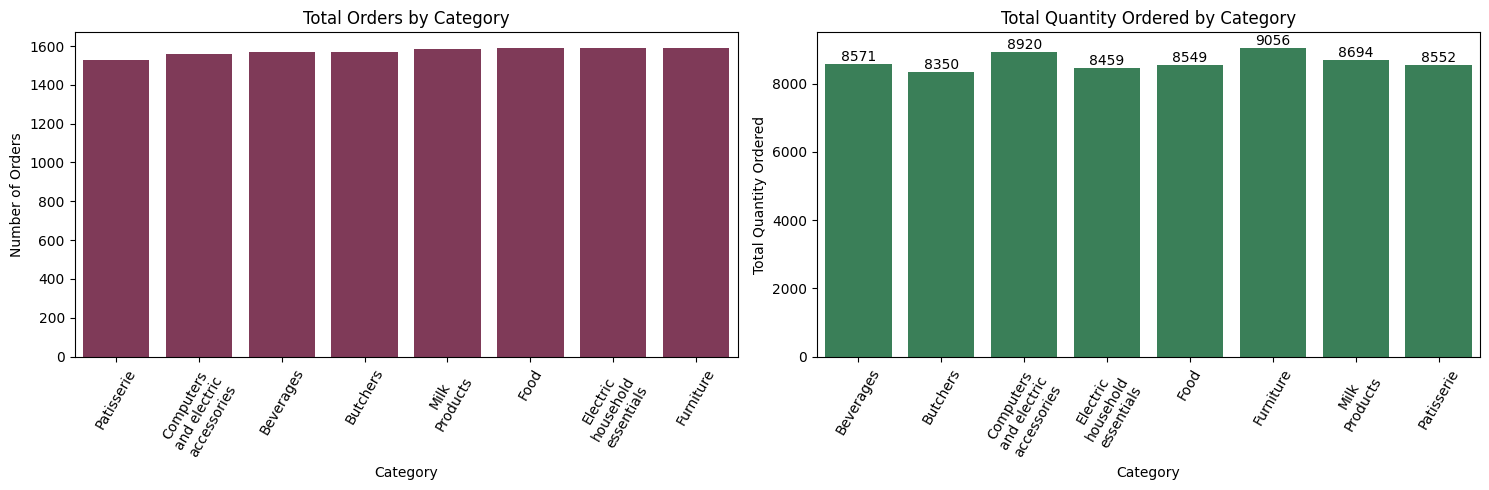

In [27]:
plt.figure(figsize=(15,5))

plt.subplot(121)
sns.countplot(rt_sales,x="Category",color="#8B2E56" ,order=order)
plt.xlabel("Category")
plt.ylabel("Number of Orders")
plt.title("Total Orders by Category")
plt.xticks(rotation=60)

plt.subplot(122)
ax=sns.barplot(data=quantity,x="Category", y="Quantity", color="#2E8B57" )
for i, row in quantity.iterrows():
    ax.text(
        i, row["Quantity"],f"{row['Quantity']:.0f}",ha='center', va='bottom')
plt.xticks(rotation=60)
plt.xlabel("Category")
plt.ylabel("Total Quantity Ordered")
plt.title("Total Quantity Ordered by Category")

plt.tight_layout()
plt.show()

**Furniture appears to have the highest number of orders, slightly above Electrical Household items. Overall, however, order counts across categories are quite similar, ranging from roughly 1,500 to 1,600 orders. The same applies to quantities sold: while the top two categories remain unchanged, the ranking of the remaining categories shifts slightly. This time, the range is wider—between 8,350 and 9,056 units sold.**

**Since Furniture leads in both order count and quantity sold, the next question is: does this dominance continue at the item-level? Let’s explore the top-performing items by frequency and sales value.**

In [28]:
rt_sales["Unique_Item"] = rt_sales["Item Number"].astype(str) + " - " + rt_sales["Category"].astype(str)

top7 = (rt_sales["Unique_Item"].value_counts().head(7).sort_values(ascending=False))
top7_qty = (rt_sales.groupby("Unique_Item")["Quantity"].sum().sort_values(ascending=False).head(7) .sort_values(ascending=False))


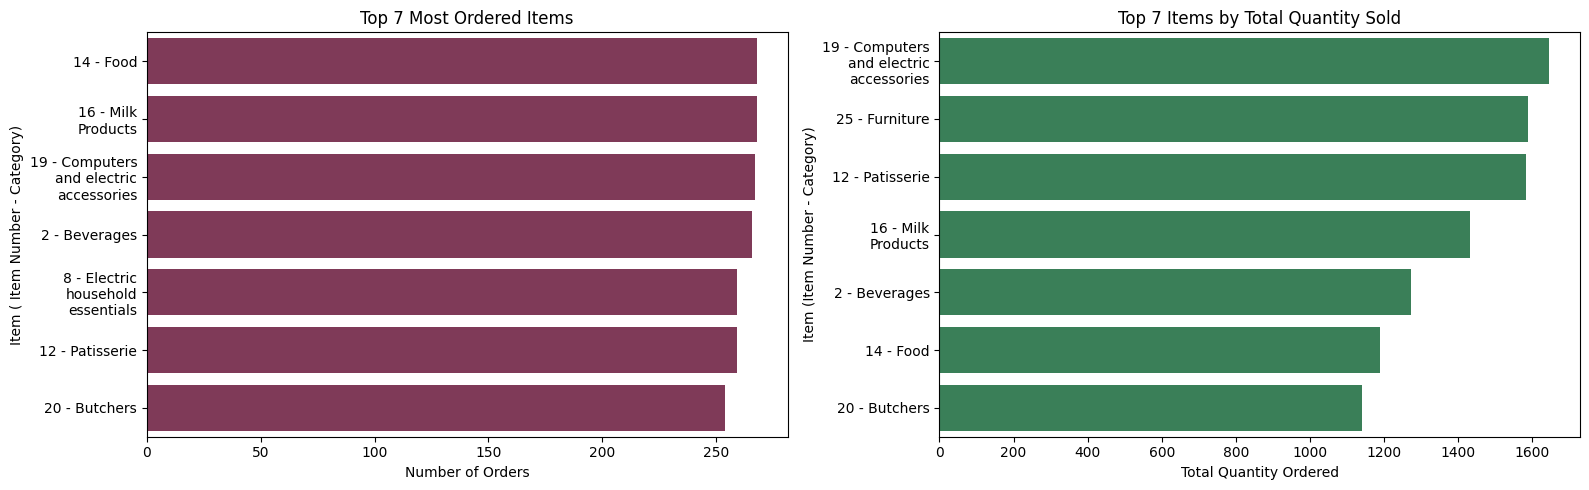

In [29]:
plt.figure(figsize=(16,5))
plt.subplot(121)
sns.barplot(x=top7.values,y=top7.index,color="#8B2E56")
plt.xlabel("Number of Orders")
plt.ylabel("Item ( Item Number - Category)")
plt.title("Top 7 Most Ordered Items")

plt.subplot(122)
sns.barplot(x=top7_qty.values,y=top7_qty.index,color="#2E8B57")
plt.xlabel("Total Quantity Ordered")
plt.ylabel("Item (Item Number - Category)")
plt.title("Top 7 Items by Total Quantity Sold")
plt.tight_layout()
plt.show()


**We notice that the Furniture category doesn’t have any items in the top 7 most-ordered items. However, when looking at quantities sold, Item 25 from the Furniture category appears as the second-highest seller, right behind Item 19 in the Computers and Electrical Accessories category. But why?** 

In [30]:
top7_items = top7_qty.index 
most_freq_qty = (rt_sales[rt_sales["Unique_Item"].isin(top7_items)].groupby("Unique_Item")["Quantity"].agg(lambda x: x.mode()[0])).sort_values(ascending=False)

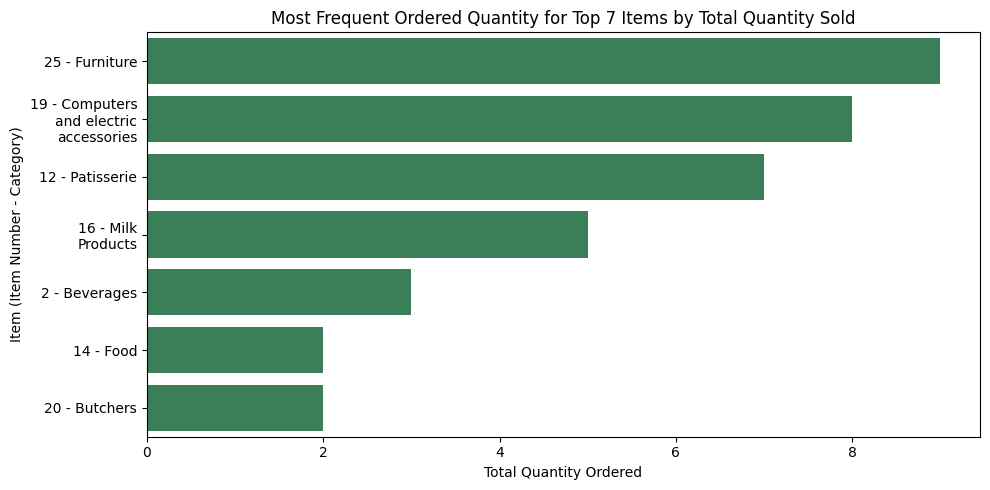

In [31]:
plt.figure(figsize=(10,5))
sns.barplot(x=most_freq_qty.values,y=most_freq_qty.index,color="#2E8B57")
plt.xlabel("Total Quantity Ordered")
plt.ylabel("Item (Item Number - Category)")
plt.title("Most Frequent Ordered Quantity for Top 7 Items by Total Quantity Sold")
plt.tight_layout()
plt.show()

**Item 25 in the Furniture category has unusually high order frequency. This suggests it may be a core essential product with consistent demand.**

In [32]:
top7_orders = rt_sales["Unique_Item"].value_counts().head(7)
top7_items = top7_orders.index

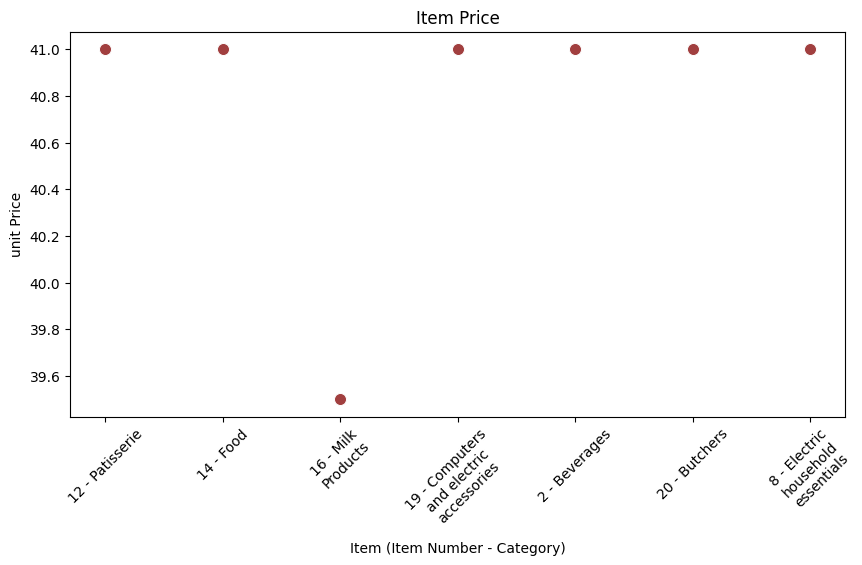

In [33]:
item_price = rt_sales[rt_sales["Unique_Item"].isin(top7_items)].groupby("Unique_Item")["Price Per Unit"].max()
plt.figure(figsize=(10,5))
sns.scatterplot(x=item_price.index,y=item_price.values,color="#A13F3F",s=75)
plt.xlabel("Item (Item Number - Category)")
plt.ylabel("unit Price")
plt.title("Item Price")
plt.xticks(rotation=45)
plt.show()

**We observe that the top 7 items by unit price are all priced at $41 per item. Interestingly, these same items also appear in the earlier rankings for most ordered and most sold by quantity—except for Item 25 (Furniture), which is not among the top 7 by unit price.**

In [34]:
item_sales = ( rt_sales.groupby("Unique_Item")["Total Spent"].sum().sort_values(ascending=False).head(7) ).sort_values(ascending=True)

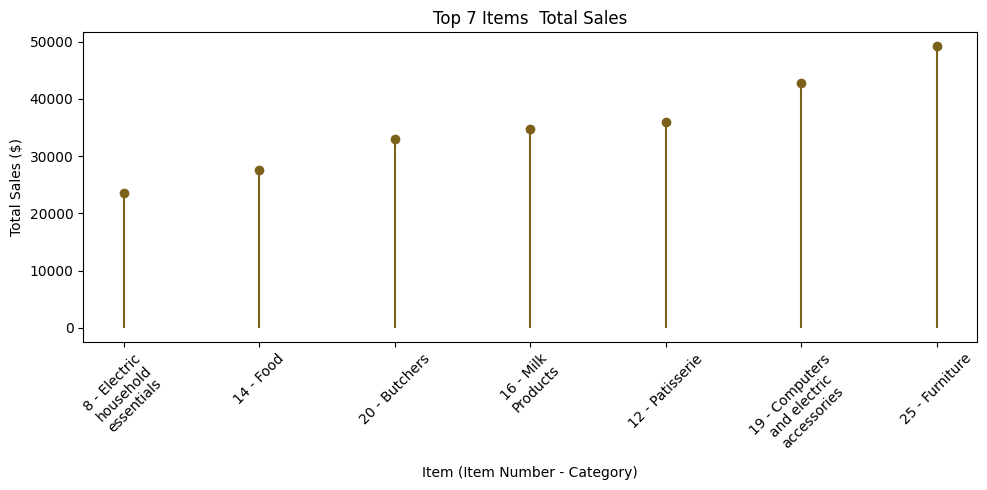

In [35]:
plt.figure(figsize=(10,5))

plt.stem(item_sales.index,  item_sales.values, linefmt="#7B611A", markerfmt="o",   basefmt=" " )

plt.xlabel("Item (Item Number - Category)")
plt.ylabel("Total Sales ($)")
plt.title("Top 7 Items  Total Sales")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


**But when we look at the top 7 items by overall sales, we find that item 25 (Furniture) not only appears on the list—it is actually the highest-selling item in the entire store. After item 25, total sales drop sharply across the remaining items. Item 25 outperforms item 19 (Computers and Electrical Accessories) by roughly 14%, and it exceeds the lowest-selling item in the top 7 by nearly 100%.**

**Now how Categories Performs on Various Payment Method and Location?**

C:\Users\moust\AppData\Local\Temp\ipykernel_26656\3963776946.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  Item_Payment = rt_sales.groupby(["Category", "Payment Method"]).size().reset_index(name="Order Count")
C:\Users\moust\AppData\Local\Temp\ipykernel_26656\3963776946.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  payment_method_totals = Item_Payment.groupby("Payment Method")["Order Count"].sum()


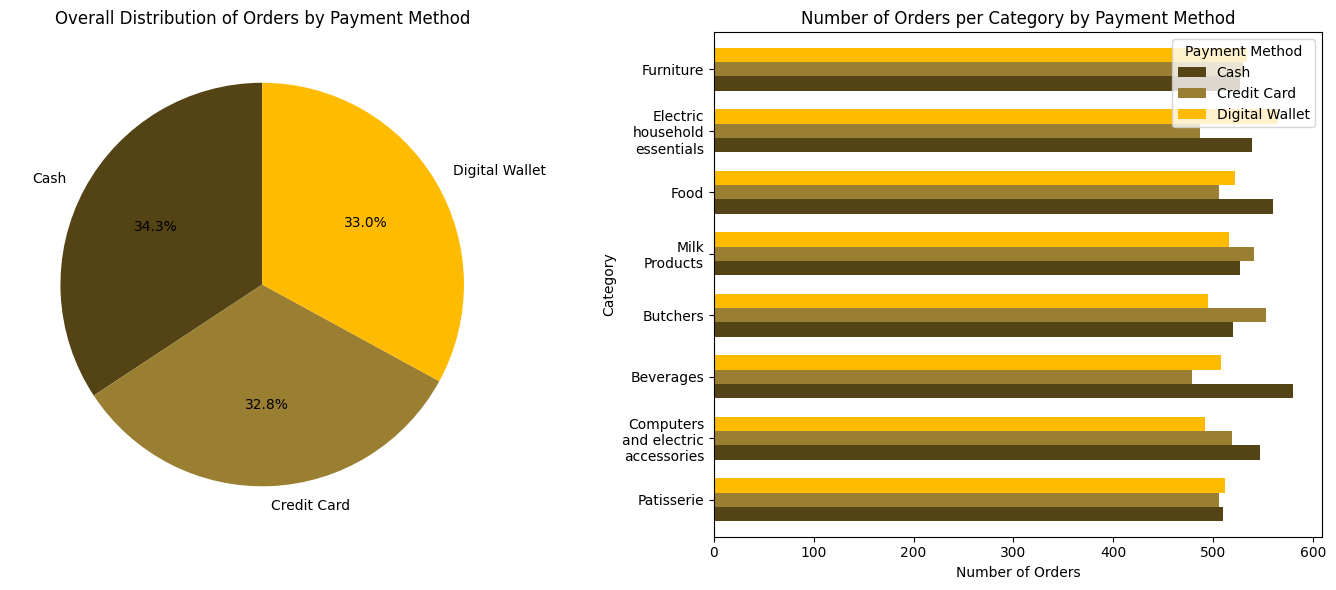

In [36]:

Item_Payment = rt_sales.groupby(["Category", "Payment Method"]).size().reset_index(name="Order Count")
item_payment_pivot = Item_Payment.pivot(index="Category", columns="Payment Method", values="Order Count").fillna(0)
item_payment_pivot["Total"] = item_payment_pivot.sum(axis=1)

item_payment_pivot = item_payment_pivot.sort_values("Total", ascending=True)
item_payment_pivot = item_payment_pivot.drop(columns="Total")

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))
payment_method_totals = Item_Payment.groupby("Payment Method")["Order Count"].sum()

ax1.pie(payment_method_totals, labels=payment_method_totals.index, autopct='%1.1f%%', startangle=90, colors=["#544315","#9A7E31", "#FFBB00"])
ax1.set_title("Overall Distribution of Orders by Payment Method")

item_payment_pivot.plot(kind="barh", stacked=False, color=["#544315","#9A7E31", "#FFBB00"], width=0.7, ax=ax2)
ax2.set_xlabel("Number of Orders")
ax2.set_ylabel("Category")
ax2.set_title("Number of Orders per Category by Payment Method")
ax2.legend(title="Payment Method")
plt.tight_layout()
plt.show()


C:\Users\moust\AppData\Local\Temp\ipykernel_26656\3602725550.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  Item_Payment_Sales = rt_sales.groupby(["Category", "Payment Method"])["Discounted Price"].sum().reset_index(name="Total Sales")


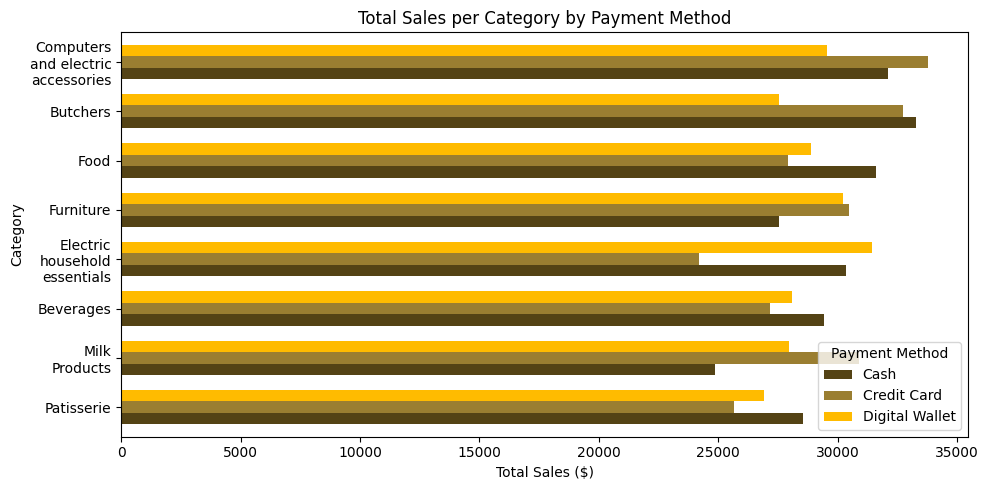

In [37]:
Item_Payment_Sales = rt_sales.groupby(["Category", "Payment Method"])["Discounted Price"].sum().reset_index(name="Total Sales")
item_payment_sales_pivot = Item_Payment_Sales.pivot(index="Category", columns="Payment Method", values="Total Sales").fillna(0)
item_payment_sales_pivot["Total"] = item_payment_sales_pivot.sum(axis=1)
item_payment_sales_pivot = item_payment_sales_pivot.sort_values("Total", ascending=True)
item_payment_sales_pivot = item_payment_sales_pivot.drop(columns="Total")

fig, ax = plt.subplots(figsize=(10, 5))
item_payment_sales_pivot.plot(kind="barh", stacked=False, color=["#544315","#9A7E31", "#FFBB00"], width=0.7, ax=ax)
ax.set_xlabel("Total Sales ($)")
ax.set_ylabel("Category")
ax.set_title("Total Sales per Category by Payment Method")
ax.legend(title="Payment Method")
plt.tight_layout()
plt.show()

C:\Users\moust\AppData\Local\Temp\ipykernel_26656\3122408856.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  location_sales = rt_sales.groupby('Location')['Discounted Price'].sum()


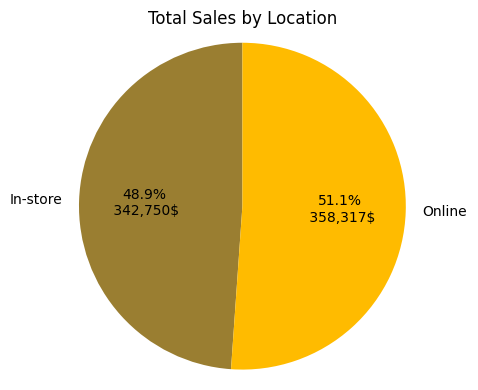

In [38]:
location_sales = rt_sales.groupby('Location')['Discounted Price'].sum()

plt.figure(figsize=(5, 4))
plt.pie(location_sales, labels=location_sales.index, autopct=lambda pct: f"{pct:.1f}%\n {round(pct / 100.*sum(location_sales), 2):,.0f}$",
        startangle=90, colors=["#9A7E31", "#FFBB00"])
plt.title("Total Sales by Location")
plt.axis('equal') 

plt.tight_layout()
plt.show()

**It appers That Cash and online Comes first in both number of orders and total Sales**

**let's Analyze Our Items performance over Time**

In [39]:
rt_sales["Transaction Year"] = pd.Categorical(
    rt_sales["Transaction Year"], 
    categories=[2022, 2023, 2024, 2025],
    ordered=True
)


In [40]:
quarter_mapping = {1: "Q1", 2: "Q2", 3: "Q3", 4: "Q4"}
rt_sales["Quarter_Label"] = rt_sales["Quarter"].map(quarter_mapping)

rt_sales["Quarter_Label"] = pd.Categorical(
    rt_sales["Quarter_Label"],
    categories=["Q1", "Q2", "Q3", "Q4"],
    ordered=True
)


C:\Users\moust\AppData\Local\Temp\ipykernel_26656\2521284593.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  quarter_sales = (rt_sales.groupby("Quarter_Label")["Total Spent"].sum()/1000).sort_index()
C:\Users\moust\AppData\Local\Temp\ipykernel_26656\2521284593.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  year_sales = (rt_sales.groupby('Transaction Year')['Discounted Price'].sum()/1000).sort_index()


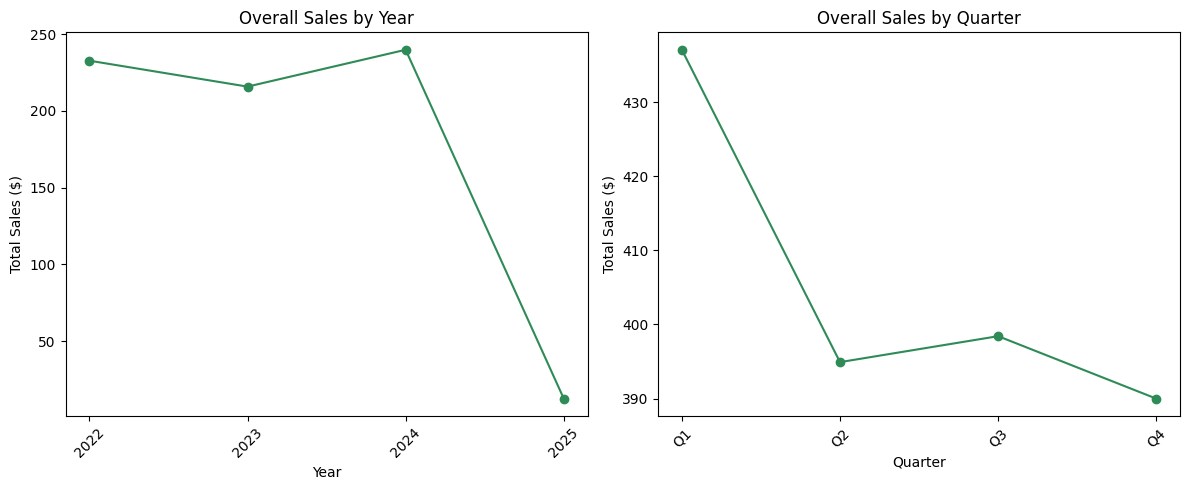

In [41]:
quarter_sales = (rt_sales.groupby("Quarter_Label")["Total Spent"].sum()/1000).sort_index()
year_sales = (rt_sales.groupby('Transaction Year')['Discounted Price'].sum()/1000).sort_index()

plt.figure(figsize=(15,4))
plt.subplot(122)
plt.plot(quarter_sales.index, quarter_sales.values, marker='o', color="#2E8B57")
plt.xticks(ticks=range(len(quarter_sales.index)), labels=quarter_sales.index)
plt.xlabel("Quarter")
plt.ylabel("Total Sales ($)")
plt.title("Overall Sales by Quarter")
plt.xticks(rotation=45)
plt.subplot(121)
year_sales.plot(kind='line', figsize=(12, 5),marker='o', color="#2E8B57")
plt.xticks(ticks=range(len(year_sales.index)), labels=year_sales.index)
plt.xlabel("Year")
plt.ylabel("Total Sales ($)")
plt.title("Overall Sales by Year")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Year 2024 Is highest selling year for the store , and Q1 is the highest selling quarter for the store.**

In [42]:
rt_sales["Transaction Month"] = pd.Categorical(rt_sales["Transaction Month"], 
                                                 categories=["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"],
                                                 ordered=True)



In [43]:
month_info = rt_sales.groupby('Transaction Month').agg(
    Total_Sales=('Discounted Price', 'sum'),
    Holidays=('Is_Holiday', 'sum')
).sort_index()
month_info['Total_Sales'] /= 1000

C:\Users\moust\AppData\Local\Temp\ipykernel_26656\3685054054.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  month_info = rt_sales.groupby('Transaction Month').agg(


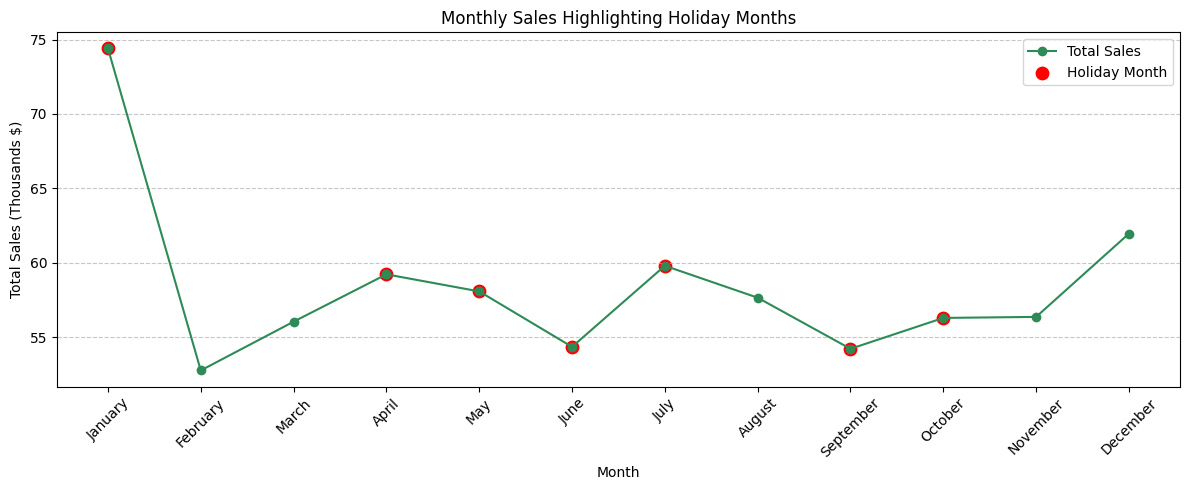

In [44]:

plt.figure(figsize=(12,5))
plt.plot(month_info.index, month_info['Total_Sales'], marker='o', color="#2E8B57", label="Total Sales")

# Highlight months with at least one holiday
holiday_months = month_info[month_info['Holidays'] > 0].index
plt.scatter(holiday_months, month_info.loc[holiday_months, 'Total_Sales'], 
            color='red', s=80, label="Holiday Month")

plt.xlabel("Month")
plt.ylabel("Total Sales (Thousands $)")
plt.title("Monthly Sales Highlighting Holiday Months")
plt.xticks(rotation=45)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()



**we see that most of Holiday Months have a higher Total Sales than the non Holiday Months ,And Jaunuary is highest selling month to the store ,  which also a Holiday Month.**

In [45]:
rt_sales["Transaction Day"] = pd.Categorical(rt_sales["Transaction Day"], 
                                               categories=["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"],
                                               ordered=True)

In [46]:
daily_sales = (rt_sales.groupby('Transaction Day')['Total Spent'].sum()/1000).sort_index()


C:\Users\moust\AppData\Local\Temp\ipykernel_26656\1255332714.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  daily_sales = (rt_sales.groupby('Transaction Day')['Total Spent'].sum()/1000).sort_index()


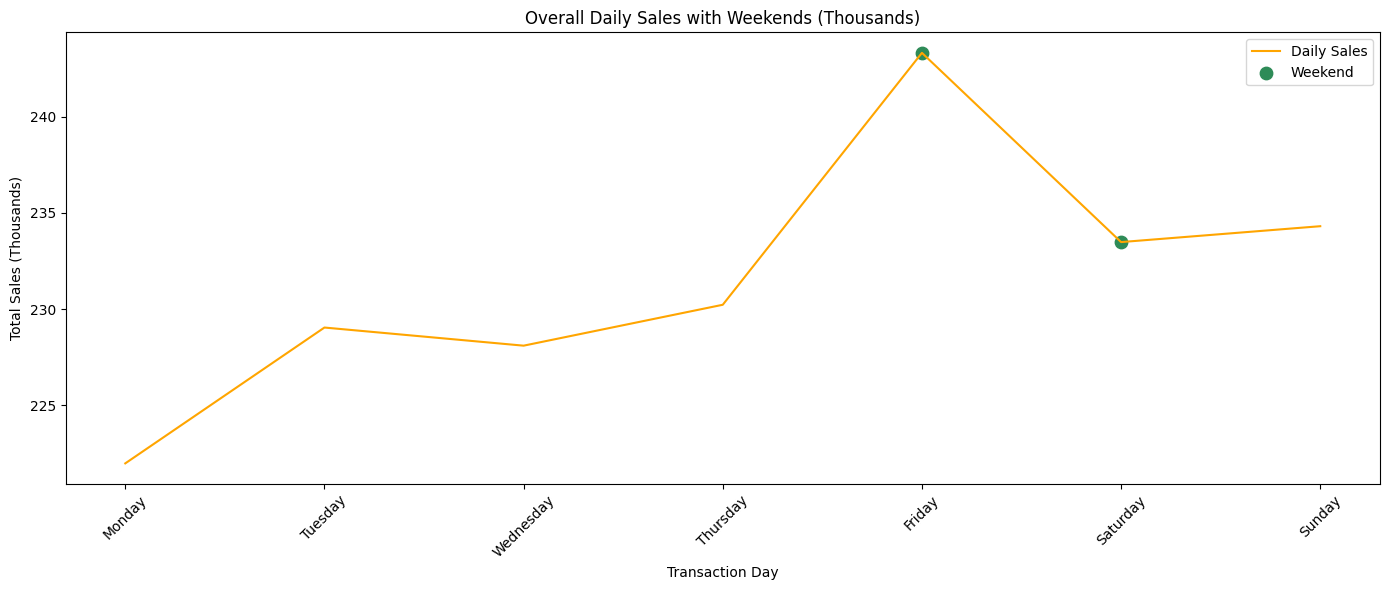

In [47]:
plt.figure(figsize=(14,6))

plt.plot(daily_sales.index, daily_sales.values, color="orange",  label="Daily Sales")

weekends = rt_sales[rt_sales["Is_Weekend"] == 1]["Transaction Day"].unique()
plt.scatter(weekends, daily_sales.loc[weekends], color='#2E8B57', s=80, label="Weekend", alpha=1)

plt.xlabel("Transaction Day")
plt.ylabel("Total Sales (Thousands)")
plt.title("Overall Daily Sales with Weekends (Thousands)")
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


**When looking to sales Through Day of weeks we see that Friday is , which is part of the weekends days is the highest selling day for the store.**